In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OneHotEncoder 
from imblearn.over_sampling import SMOTE
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [2]:
df = pd.read_csv('clean_data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [3]:
df = df.drop(labels=['fnlwgt','education','relationship'],axis=1)

In [4]:
x = df.drop(labels=['income'],axis=1)
y = df['income']

In [5]:
x.shape

(30138, 11)

In [6]:
x['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2],
      dtype=int64)

In [7]:
x['native-country'] = x['native-country'].replace({' United-States':1, ' Cuba':2, ' Jamaica':3, ' India':4, ' Mexico':5,
                                 ' Puerto-Rico':6, ' Honduras':7, ' England':8, ' Canada':9, ' Germany':10,
                                 ' Iran':11, ' Philippines':12, ' Poland':13, ' Columbia':14, ' Cambodia':15,
                                 ' Thailand':16, ' Ecuador':17, ' Laos':18, ' Taiwan':19, ' Haiti':20, ' Portugal':21,
                                 ' Dominican-Republic':22, ' El-Salvador':23, ' France':24, ' Guatemala':25,
                                 ' Italy':26, ' China':27, ' South':28, ' Japan':29, ' Yugoslavia':30, ' Peru':31,
                                 ' Outlying-US(Guam-USVI-etc)':32, ' Scotland':33, ' Trinadad&Tobago':34,
                                 ' Greece':35, ' Nicaragua':36, ' Vietnam':37, ' Hong':38, ' Ireland':39,
                                 ' Hungary':41, ' Holand-Netherlands':42})

In [8]:
x['occupation'] = x['occupation'].replace({' Exec-managerial':1, ' Handlers-cleaners':2, ' Prof-specialty':3,
                                           ' Other-service':4, ' Adm-clerical':5, ' Sales':6, ' Transport-moving':7,
                                           ' Farming-fishing':8, ' Machine-op-inspct':9, ' Tech-support':10,
                                           ' Craft-repair':11, ' Protective-serv':12, ' Armed-Forces':13,' Priv-house-serv':14})

In [9]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = x.select_dtypes(include='object').columns
numerical_cols = x.select_dtypes(exclude='object').columns

In [10]:
numerical_cols

Index(['age', 'education-num', 'occupation', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country'],
      dtype='object')

In [11]:
categorical_cols = ['workclass', 'marital-status', 'race', 'sex']

In [12]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

## Categorical Pipeline
ohe_transformer = OneHotEncoder()
    
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('OneHotEncoder',ohe_transformer,categorical_cols)
])

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

In [14]:
x_train.shape

(21096, 11)

In [15]:
y_train.value_counts()

0    15821
1     5275
Name: income, dtype: int64

In [16]:
x_test.shape

(9042, 11)

In [17]:
X_train=pd.DataFrame(preprocessor.fit_transform(x_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(x_test),columns=preprocessor.get_feature_names_out())

In [18]:
smote=SMOTE()
x_rec,y_rec=smote.fit_resample(X_train,y_train)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [20]:
def evaluate_model(true, predicted):
    Accuracy_score = accuracy_score(true,predicted)
    return Accuracy_score

In [21]:
## Train multiple models

models={
    'LogisticRegression':LogisticRegression(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier()
}
trained_model_list=[]
model_list=[]
accuracy_train = []
accuracy_list=[]
y_predict = []

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_rec,y_rec)

    #Make Predictions
    y_train_pred = model.predict(x_rec)
    y_pred=model.predict(X_test)
    

    Accuracy_train=evaluate_model(y_rec,y_train_pred)
    Accuracy=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    y_predict.append(y_pred)

    print('Model Training Performance')
    print("Accuracy_train:",Accuracy_train*100)
    print("Accuracy:",Accuracy*100)

    accuracy_train.append(Accuracy_train)
    accuracy_list.append(Accuracy)
    
    print('='*35)
    print('\n')

C:\Users\shreyash12\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
Model Training Performance
Accuracy_train: 81.43922634473168
Accuracy: 79.84959079849591


DecisionTree
Model Training Performance
Accuracy_train: 98.45142532077618
Accuracy: 81.13249281132494


RandomForest
Model Training Performance
Accuracy_train: 98.45142532077618
Accuracy: 83.68723733687237




In [22]:
df1 = pd.DataFrame({'model':model_list,'train_accuracy':accuracy_train,'test_accuracy':accuracy_list})
df1

,model,train_accuracy,test_accuracy
0,LogisticRegression,0.814392,0.798496
1,DecisionTree,0.984514,0.811325
2,RandomForest,0.984514,0.836872


In [23]:

import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='model'>

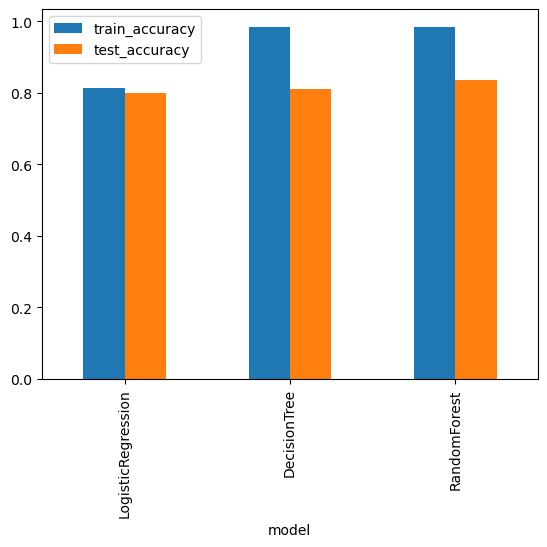

In [24]:
df1.plot(x='model',y=['train_accuracy','test_accuracy'],kind='bar')